# STATS 131 S19 Final Project - Pokemon

### Albert Na, Kathy Fu, Mark Tolentino, Tiffaney Pi

# Background Info:

   We will be using data from the popular franchise known as Pokémon. Since its release as a video game in the late 90s, there have been numerous installments and updated versions of the game. As a result, every “generation” of these new video games produced a new wave of different Pokémon. Since our data only contains Pokémon up to the sixth generation, for the purposes of our project we will only be looking at the Pokémon from the corresponding video games Pokémon X and Y. 
   There exist 800 different Pokémon, including those with Mega Evolutions (addressed in detail later). Each Pokémon can have one or a combination of two types. Types are properties that a Pokémon has and their moves. There are a total of 18 Pokémon types, and each type has weaknesses and resistances to another type. These 18 types are: fire, water, grass, electric, ground, ice, flying, rock, steel, normal, fighting, ghost, dark, psychic, poison, dragon, fairy, and bug. While having two types may be advantageous in regards to having a more diverse range of attacks, having two types is not always beneficial, as the weaknesses of the second type may be exposed. 
    When playing the game, a player may choose to complete a variety of tasks, but the ultimate goal for most is to become overall “stronger” with their Pokémon and/or to catch all the Pokémon. A typical user of the game may roam across different landscapes and battle both wild and trained Pokémon that they encounter. Players can capture wild Pokémon which have varied baseline statistics. From there, players can increase the level and strength of their Pokémon by defeating other Pokémon. The strength of a Pokémon can be measured by their numeric statistics, which will be elaborated in full later. Pokémon that are considered to be rare are generally much stronger and possess more unique battle techniques.

   The main objective of the video game is to defeat a series of trainers called the Elite Four, and the Champion. The Elite Four are analogous to the “bosses” in the video game and the Champion is the “final boss”, and these bosses and their specific Pokémon differ between each version of the game. Each Elite Four member battles with four or five pre-set Pokémon, while the Champion will battle with five pre-set Pokémon.  Known as the Kalos Elite Four in the Pokemon X and Y version of the game, the Kalos Elite Four is made up of four strong trainers that each battle using a specific type of Pokémon. Our Elite Four members are named Malva, Siebold, Wikstrom and Drasna, specializing in fire, steel, water and dragon, respectively. The Champion, on the other hand, uses a variety of different types during battle. Since the Pokémon in the Kalos Elite Four and Champion are always the same, we can take advantage of their type weaknesses to determine the Pokémon best suited to battle them. During the battle, players may use a maximum number of six Pokémon to try and defeat the trainers. The goal of our project then becomes: How can we choose the best six-member Pokémon team to defeat the Elite Four and the Champion?
Our data contains baseline statistics variables of the first generation to sixth generation of Pokémon. Each observational unit, or row, represents one Pokémon. As mentioned before, there are 800 total Pokémon in our specified version of the video game. In our dataset, the variables are: # in the Pokédex, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, and Legendary. The “#” variable in our data corresponds to the catalogue number that a Pokemon appears in the Pokedex, which can be thought of as a dictionary of all existing Pokemon. Each Pokémon has a unique number assigned to it in the Pokedex. This dataset contains all evolved Pokemon as well. Evolution is a process in which a Pokémon changes into a different species of Pokémon. The most common way for Pokémon to evolve is by leveling up at or above a certain level, and they can either evolve once, twice, or not at all. Evolved Pokémon will have higher baseline statistics and can learn a variety of different moves. The Name variable of course represents the name of each Pokemon which is unique. As mentioned earlier, a Pokémon may have one or two types reflected by the variables Type I and Type II. These determine which types the Pokémon is strong or weak against, and will be important in our analysis. 

   Each Pokémon also has stats that affect its ability to perform in battle. HP, otherwise known as hit points, is the amount of damage a Pokémon is able to take until it faints and is no longer able to battle for the duration of the match. The offensive stats, Attack and Sp. Atk (Special Attack), reflect a Pokémon’s ability to perform physical and special power, respectively. Special attacks are non-physical attacks, so a Pokemon with type fire may have the special attack move “Flamethrower”. Conversely, Defense and Sp. Def reflect a Pokémon’s ability to resist physical and special attacks, respectively. Finally, Speed is the stat that determines how fast a Pokemon moves. In battle, the Pokémon that has the higher Speed will get to “go first”, or perform the first move, in the battle. Certain types of Pokémon are more likely to be stronger in certain numeric metrics (for example, Steel Type Pokémon tend to have very high Defense compared to other Pokemon). We will explore these relationships further in our analysis. The remaining variables are Generation and Legendary status. The Generation variable reflects how recently the Pokémon was created and released by game developers, with six being the most recent and one being the oldest. For instance, when the third version of the video game was released, named Pokemon Ruby and Sapphire, the set of generation three Pokemon were new at the release of that version. The last variable, Legendary, identifies which Pokémon are legendary (shown as True or False in the dataset). Legendary Pokémon are considered rare because they are difficult to capture and as a result have very strong base stats. 

 There are several different factors that we took into consideration before choosing the ideal Pokémon for these battles. Pokémons’ stats increase as they level up, but we will focus on their base stats because the amount that these stats increase is limited. They can level up to level 100; however, those with higher base stats will have higher stats at level 100 than those with lower base stats. We will also disregard mega evolution Pokémon and legendary Pokémon when choosing our best team of 6 to face the Elite Four. Mega evolutions are transformations that increase a Pokémon’s stats and may change its type; however, only one is allowed per battle, and it is optional and temporary. Also, Legendary Pokémon are extremely difficult to capture and would too easily outperform other Pokémon. Although, each member of the Elite Four does not use six Pokémon, we will choose to use six Pokémon because it is the max number of Pokémon one can hold in battle and most players choose to do so when battling strong opponents. We will take all of these factors into consideration to determine the best Pokémon to battle the Elite Four and Champion. We are not guaranteeing that our team of 6 will win, rather we are saying these Pokémon are most equipped and likely to defeat them.
 
   Previous studies have been done on Pokémon video games. For example, machine learning algorithms were created to predict which Pokémon are legendary based on their stats. Additionally, people made predictions to determine which Pokémon are competitively banned based on their frequency of use in battle. These analyses helped players during competitions and allowed them to understand the game better.


## Here we will be reading in our Pokemon dataset, along with some

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [0]:
pokemon = pd.read_csv("https://raw.githubusercontent.com/tiffypi/subtlepythontraits_stats131/master/Pokemon.csv")

In [0]:
pokemon['Type 2'].fillna(value='None', inplace=True)
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False


In [0]:
pokemon.shape #dimensions

(800, 13)

In [0]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
#             800 non-null int64
Name          800 non-null object
Type 1        800 non-null object
Type 2        800 non-null object
Total         800 non-null int64
HP            800 non-null int64
Attack        800 non-null int64
Defense       800 non-null int64
Sp. Atk       800 non-null int64
Sp. Def       800 non-null int64
Speed         800 non-null int64
Generation    800 non-null int64
Legendary     800 non-null bool
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [0]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

### We will also use a Pokemon Type Chart data. This data has all the possible one and two type combination of Pokemon (columns 1 and 2) and the attacker types listed across the rest of the column names. The numbers 0.5-4.0 represent a Pokemon's effectiveness against another Pokemon for all types. Later on in our analysis, we will use this type chart data to assemble the best 6-member team to battle the Kalos Elite Four.

### e.g.: "A Pokemon of Water type (column 5) is 2 times effective against Normal & Fire type Pokemon."

In [0]:
types = pd.read_csv("https://raw.githubusercontent.com/tiffypi/subtlepythontraits_stats131/master/type-chart.csv")
types['defense-type2'].fillna(value='none', inplace=True)
types.head()

,defense-type1,defense-type2,normal,fire,water,electric,grass,ice,fighting,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,normal,none,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1,normal,fire,1.0,0.5,2.0,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,0.5,2.0,0.0,1.0,1.0,0.5,0.5
2,normal,water,1.0,0.5,0.5,2.0,2.0,0.5,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0
3,normal,electric,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,0.5,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0
4,normal,grass,1.0,2.0,0.5,0.5,0.5,2.0,2.0,2.0,0.5,2.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0


In [0]:
types.shape

(324, 20)

In [0]:
types.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 20 columns):
defense-type1    324 non-null object
defense-type2    324 non-null object
normal           324 non-null float64
fire             324 non-null float64
water            324 non-null float64
electric         324 non-null float64
grass            324 non-null float64
ice              324 non-null float64
fighting         324 non-null float64
poison           324 non-null float64
ground           324 non-null float64
flying           324 non-null float64
psychic          324 non-null float64
bug              324 non-null float64
rock             324 non-null float64
ghost            324 non-null float64
dragon           324 non-null float64
dark             324 non-null float64
steel            324 non-null float64
fairy            324 non-null float64
dtypes: float64(18), object(2)
memory usage: 50.7+ KB


# (1) Exploratory Data Analysis

## (a) Are any of the statistics correlated? 

### The presence of Legendary Pokemon and Mega-Evolved Pokemon can potentially be a confounding variable and they cannot be used in the Elite Four, so we will remove them for the purpose of our analysis from the beginning. 

In [0]:
pokemonNormal = pokemon.loc[pokemon.Legendary == False]

In [0]:
# removing duplicates #s (id's) will remove of the Mega Evoled Pokemon 
pokemonNormal.rename(columns={'#': 'id'}, inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [0]:
# pokemon[pokemon.duplicated('id', keep=False)].head(5) ## the duplicated pokemons (we want to keep the FIRST one) ##
pokemonNormal.drop_duplicates('id', keep='first', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Upon removing all the Legendary Pokemon, the total number of Pokemon we are working with now is 735. The average HP is 66.63 across all these normal pokemon. The standard deviation across all variables are numeric metrics except the Total are pretty similar ranging between 24 to 28. The standard deviation of total varies a lot more at 98.64.

In [0]:
pokemonNormal.iloc[:,4:13].describe() #spread and IQR of numeric variables

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,404.161481,66.634074,72.872593,68.562963,65.808889,66.604444,63.678519,3.291852
std,98.636245,25.342889,28.040058,28.134060,26.526633,24.881481,26.493917,1.678766
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,316.000000,50.000000,52.000000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,410.000000,65.000000,70.000000,65.000000,61.000000,65.000000,60.000000,3.000000
75%,490.000000,78.000000,90.000000,83.500000,85.000000,80.000000,82.500000,5.000000
max,670.000000,255.000000,165.000000,230.000000,150.000000,230.000000,160.000000,6.000000


### Pairplot: Showing relationship between all baseline statistic variables- HP, Attack, Defense, Sp. Atk, Sp. Def, Speed
#### In the diagonals of the pairplot matrix, we also see the distribution of all the baseline statistics as well. They are unimodal with a slight right skew.

In [0]:
def show_corr(x, y, **kwargs):
    (r, _) = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate(
        'r = {:.2f}'.format(r),
        xy=(0.45, 0.85),
        xycoords=ax.transAxes
    )

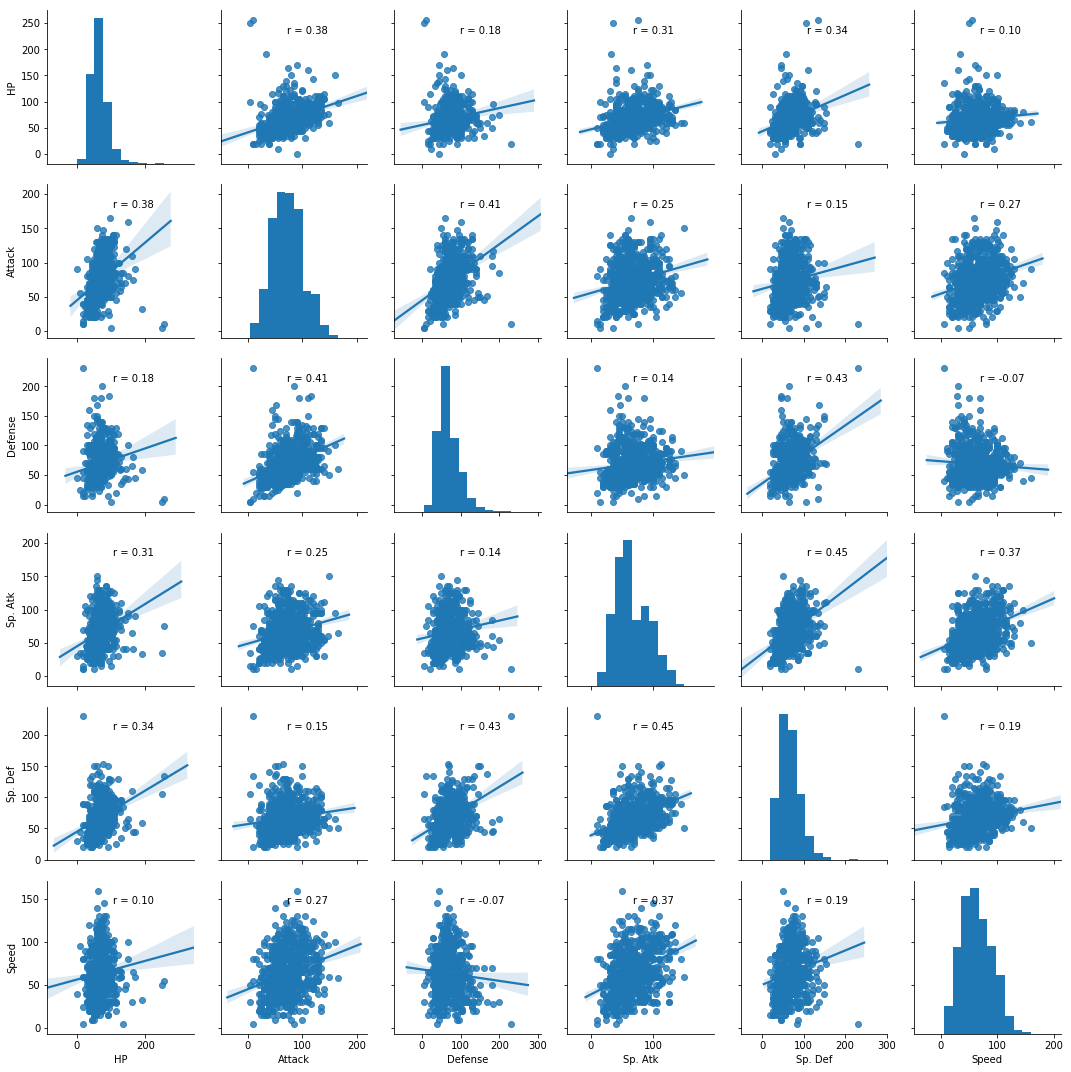

In [0]:
sns.pairplot(pokemonNormal.iloc[:,5:11], kind="reg").map_offdiag(show_corr)

#### As we see in the pairplot above, the 5 most correlated pairs of statistics are:
1. Sp. Defense/Sp. Attack
2. Defense/Sp. Defense
3. Defense/Attack
4. HP/Attack
5. Speed/Sp. Attack

#### None of the statistics are strongly correlated, which is important as that would favor certain Pokemon over others. We also point out that all of the variables are positively correlated, except for Defense and Speed - this case is demonstrated by Steel and Rock type Pokemon, who have the highest Defense and very low Speed. 

#### In the table below showing average Defense and Speed, we see the inverse relationship more closely.


In [0]:
pokemonNormal.sort_values('Defense', ascending=False).groupby('Type 1')[('Defense','Speed')].mean().sort_values(by='Defense', ascending=False).head(5)

,Defense,Speed
Type 1,,
Steel,112.666667,46.888889
Rock,96.052632,50.552632
Ground,79.821429,59.750000
Ghost,74.863636,59.500000
Dragon,71.058824,67.941176


## (b) What is the relationship between a Pokemon's type and the six baseline statistics? 

### The strongest single type of Pokemon ranked by their Total statistic:

In [0]:
pokemonNormal.groupby('Type 1')['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'].mean().sort_values(['Total'], ascending=False)                                                                                            

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Dragon,443.941176,69.117647,96.647059,71.058824,65.176471,74.000000,67.941176
Steel,432.666667,58.611111,86.277778,112.666667,60.166667,68.055556,46.888889
Rock,426.052632,63.815789,86.789474,96.052632,58.947368,69.894737,50.552632
Fire,423.380952,65.285714,79.023810,60.928571,79.476190,65.595238,73.071429
Dark,418.961538,64.807692,84.384615,66.038462,65.692308,65.461538,72.576923
Ice,412.523810,70.380952,71.000000,68.285714,73.619048,67.904762,61.333333
Ghost,412.000000,57.545455,65.136364,74.863636,79.545455,75.409091,59.500000
Water,410.549020,70.107843,70.245098,69.568627,70.000000,66.401961,64.225490
Psychic,407.615385,67.871795,51.666667,59.538462,84.846154,78.025641,65.666667


### The strongest dual type Pokemon ranked by their Total statistic.

In [0]:
pokemonNormal.groupby(['Type 1','Type 2'])['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'].mean().sort_values(['Total'], ascending=False).head(20)

Total     HP  ...     Sp. Def       Speed
Type 1   Type 2                       ...                        
Psychic  Grass     600.000000  100.0  ...  100.000000  100.000000
Rock     Dark      600.000000  100.0  ...  100.000000   61.000000
Dragon   Flying    563.333333   87.0  ...   95.000000   86.666667
Water    Fighting  545.000000   90.5  ...   90.000000   89.000000
         Dragon    540.000000   75.0  ...   95.000000   85.000000
Fire     Psychic   534.000000   75.0  ...  100.000000  104.000000
Water    Steel     530.000000   84.0  ...  101.000000   60.000000
Normal   Psychic   527.500000   85.0  ...   96.500000   87.500000
Grass    Ground    525.000000   95.0  ...   85.000000   56.000000
Fighting Steel     525.000000   70.0  ...   70.000000   90.000000
Psychic  Fighting  518.000000   68.0  ...  115.000000   80.000000
Water    Ice       511.666667   90.0  ...   78.333333   66.666667
Steel    Ground    510.000000   75.0  ...   65.000000   30.000000
Bug      Steel     508.800000   68.8  ...   77.600000   66.600000
Ground   Steel     508.000000  110.0  ...   65.000000   88.000000
Poison   Ground    505.000000   85.5  ...   80.000000   80.500000
Fighting Flying    500.000000   78.0  ...   63.000000  118.000000
Rock     Fairy     500.000000   50.0  ...  150.000000   50.000000
Bug      Fighting  500.000000   80.0  ...   95.000000   85.000000
Fighting Dark      495.000000   95.0  ...   71.000000   58.000000

[20 rows x 7 columns]

### Type 1 vs. Total:
- Fighting and Ice type Pokemon have the highest average Total.
- Flying and Fairy type Pokemon have the lowest average Total.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

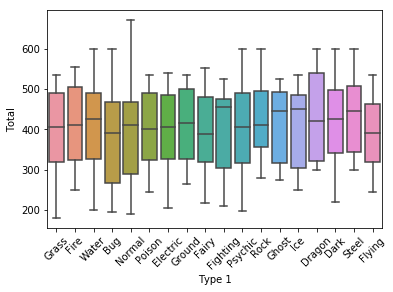

In [0]:
sns.boxplot(x='Type 1', y='Total', data=pokemonNormal)
plt.xticks(rotation=45)

### Type 1 vs. HP:
- Fairy and Normal type Pokemon have the highest average HP.
- Bug, Electric, and Ghost type Pokemon have the lowest average HP. 

(0, 150)

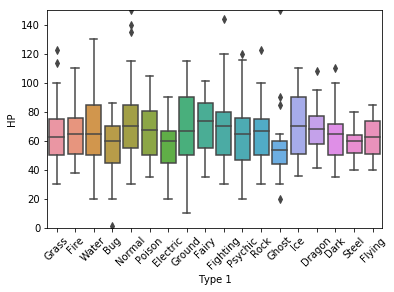

In [0]:
sns.boxplot(x='Type 1', y='HP', data=pokemonNormal)
plt.xticks(rotation = 45)
plt.ylim((0,150))

(0, 150)

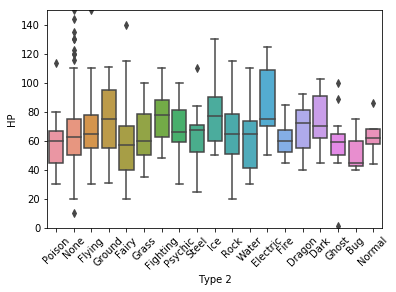

In [0]:
sns.boxplot(x='Type 2', y='HP', data=pokemonNormal)
plt.xticks(rotation = 45)
plt.ylim((0,150))

### Type 1 vs. Attack:
- Fighting and Dragon type Pokemon have the highest average Attack.
- Flying, Psychic, and Fairy type Pokemon have the lowest average Attack.

(0, 200)

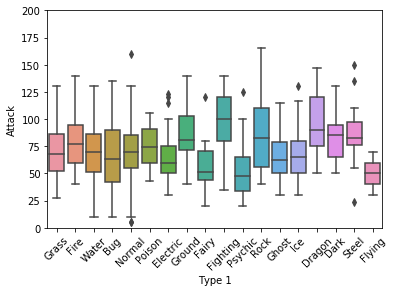

In [0]:
sns.boxplot(x='Type 1', y='Attack', data=pokemonNormal)
plt.xticks(rotation = 45)
plt.ylim((0,200))

### Type 1 vs. Defense:
- Steel and Rock type Pokemon have the highest average Defense.
- Psychic and Flying type Pokemon have the lowest average Defense.

(0, 210)

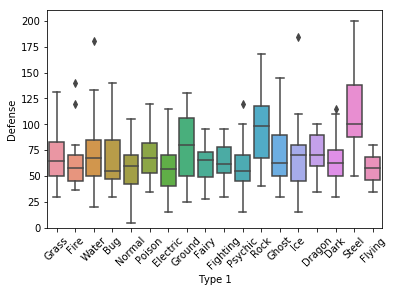

In [0]:
sns.boxplot(x='Type 1', y='Defense', data=pokemonNormal)
plt.xticks(rotation = 45)
plt.ylim((0,210))

### Type 1 vs. Speed: 
- Flying and Electric type Pokemon have the highest average Speed.
- Fairy, Rock, and Steel type Pokemon have the lowest average Speed.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

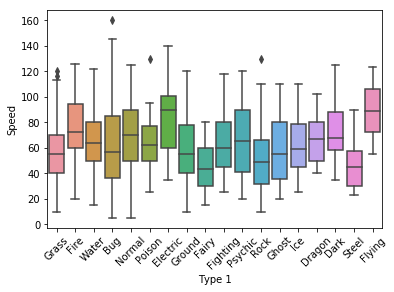

In [0]:
sns.boxplot(x='Type 1', y='Speed', data=pokemonNormal)
plt.xticks(rotation = 45)

### In the boxplot of Generation vs. Total, it seems that all of the Generations have similar average Totals, except Generation 4 which has a significantly higher average Total. 

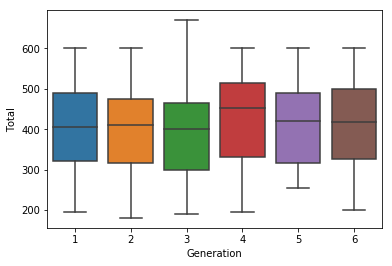

In [0]:
sns.boxplot(x='Generation', y='Total', data=pokemonNormal) #Each generation has a similar spread of numeric values

## (c) Do Pokemon with 1 type or 2 types have better baseline statistics overall? 



In [0]:
print(pokemonNormal['Type 1'].nunique())
print(pokemonNormal['Type 1'].unique())

18
['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


### What are the most common Type 1 of Pokemon? Water and Normal Type.

In [0]:
num_Type1 = pokemonNormal['Type 1'].value_counts()
num_Type1

Water       102
Normal       91
Grass        64
Bug          63
Fire         42
Psychic      39
Rock         38
Electric     33
Poison       28
Ground       28
Dark         26
Fighting     25
Ghost        22
Ice          21
Steel        18
Dragon       17
Fairy        16
Flying        2
Name: Type 1, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'What are the most common types of Pokemon? (Type 1)')

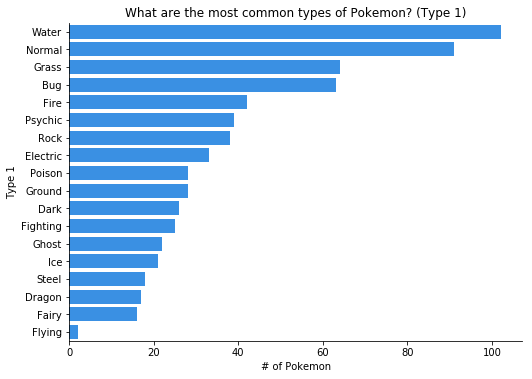

In [0]:
sns.factorplot(y='Type 1', data=pokemonNormal,kind='count', order=pokemonNormal['Type 1'].value_counts().index, aspect=1.5,
               color='dodgerblue').set_axis_labels('# of Pokemon', 'Type 1')
plt.title('What are the most common types of Pokemon? (Type 1)')

### What are the most common Type 2 of Pokemon? None. 

In [0]:
num_Type2 = pokemonNormal['Type 2'].value_counts()
num_Type2

None        352
Flying       78
Poison       31
Ground       29
Psychic      24
Grass        18
Steel        18
Fairy        17
Fighting     16
Dark         16
Rock         14
Water        12
Dragon       11
Ghost        11
Ice           9
Fire          7
Electric      5
Normal        4
Bug           3
Name: Type 2, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'What are the most common Pokemon? (Type 2)')

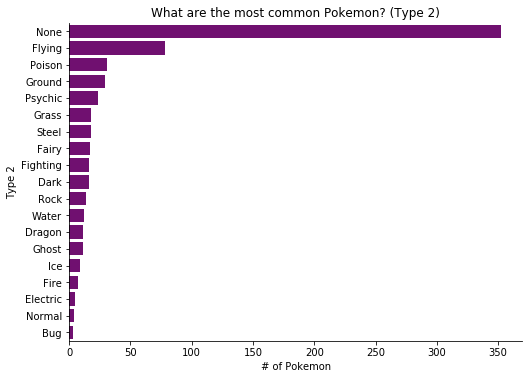

In [0]:
sns.factorplot(y='Type 2', data=pokemonNormal, kind='count', order=pokemonNormal['Type 2'].value_counts().index, aspect=1.5,
               color='purple').set_axis_labels('# of Pokemon', 'Type 2')
plt.title('What are the most common Pokemon? (Type 2)')

### To gain a more holistic understanding of the most common types, we will combine the frequencies of Type1 and Type2 into num_Types (number of Types).

In [0]:
num_Types = num_Type1 + num_Type2 #combined Type1 and Type2 into num_Types
num_Types.sort_values(ascending=False).dropna()

Water       114.0
Normal       95.0
Grass        82.0
Flying       80.0
Bug          66.0
Psychic      63.0
Poison       59.0
Ground       57.0
Rock         52.0
Fire         49.0
Dark         42.0
Fighting     41.0
Electric     38.0
Steel        36.0
Fairy        33.0
Ghost        33.0
Ice          30.0
Dragon       28.0
dtype: float64

Text(0.5, 1.0, 'What are the most common types of Pokemon? (Both Types)')

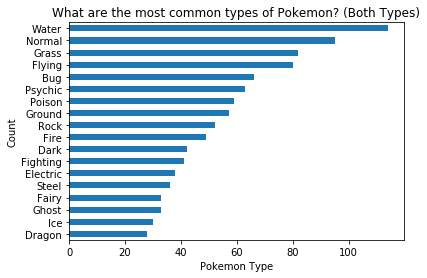

In [0]:
num_Types.sort_values().dropna().plot(kind="barh")
plt.xlabel("Pokemon Type")
plt.ylabel("Count")
plt.title("What are the most common types of Pokemon? (Both Types)")

### What is the most frequent combination of Pokemon that have 2 Types? 

In [0]:
pokemonNormal['All Types'] = pokemonNormal['Type 1'].str.cat(pokemonNormal['Type 2'],sep=" ")

# subset data to only Pokemons with 2 types
twotypes = pokemonNormal[pokemonNormal['Type 2'] != 'None']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
# Alphabetically sort WITHIN the 'All Types' column because the order of Pokemon Type does not matter (i.e.: Water Electric == Electric Water)
twotypes['All Types'] = twotypes['All Types'].apply(lambda x: ' '.join(sorted(x.split())))
twotypes.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All Types
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass Poison
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Fire Flying
15,12,Butterfree,Bug,Flying,395,60,45,50,90,80,70,1,False,Bug Flying
16,13,Weedle,Bug,Poison,195,40,35,30,20,20,50,1,False,Bug Poison
17,14,Kakuna,Bug,Poison,205,45,25,50,25,25,35,1,False,Bug Poison
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False,Bug Poison
20,16,Pidgey,Normal,Flying,251,40,45,40,35,35,56,1,False,Flying Normal
21,17,Pidgeotto,Normal,Flying,349,63,60,55,50,50,71,1,False,Flying Normal


Text(0.5, 1.0, 'What are the most frequent dual types of Pokemon?')

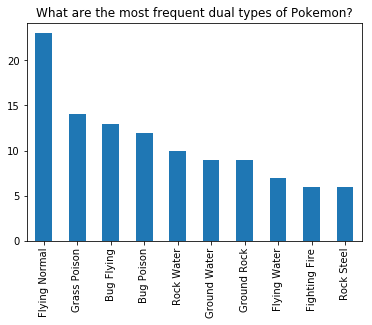

In [0]:
twotypes['All Types'].value_counts().sort_values(ascending=False).head(10).plot.bar()
plt.title('What are the most frequent dual types of Pokemon?')

### Are those who have two types better in any way than those with just one type?

#### ONE TYPE POKEMON: 

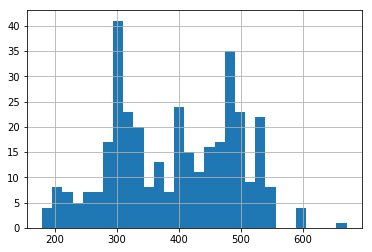

In [0]:
has_one_type = pokemonNormal.loc[pokemonNormal['Type 2'] == 'None'] # Pokemon that only have ONE type
has_one_type['Total'].hist(bins=30)

In [0]:
has_one_type.loc[has_one_type.Total > 550,].sort_values('Total', ascending=False) # Finding the strongest ONE type Pokemon

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All Types
313,289,Slaking,Normal,None,670,150,160,100,95,65,100,3,False,Normal None
165,151,Mew,Psychic,None,600,100,100,100,100,100,100,1,False,Psychic None
546,488,Cresselia,Psychic,None,600,120,70,120,75,130,85,4,False,Psychic None
548,490,Manaphy,Water,None,600,100,100,100,100,100,100,4,False,Water None
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,Dragon None
64,59,Arcanine,Fire,None,555,90,110,80,100,80,95,1,False,Fire None
739,671,Florges,Fairy,None,552,78,65,68,112,154,75,6,False,Fairy None


#### TWO TYPE POKEMON:

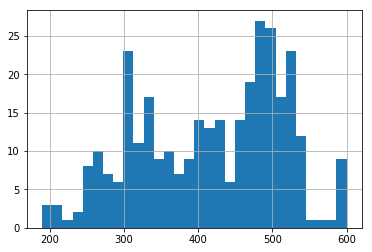

In [0]:
has_two_types = pokemonNormal.loc[pokemonNormal['Type 2'] != 'None'] # Pokemon that have TWO types
has_two_types['Total'].hist(bins=30)

In [0]:
has_two_types.loc[has_two_types.Total > 550,].sort_values('Total', ascending=False) # All of the TWO type Pokemon with the highest Total are MegaEvolved.

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All Types
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False,Dragon Flying
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False,Rock Dark
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,Psychic Grass
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False,Dragon Flying
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False,Steel Psychic
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,Dragon Ground
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False,Dark Dragon
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False,Normal Psychic
717,649,Genesect,Bug,Steel,600,71,120,95,120,95,99,5,False,Bug Steel
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False,Water Fighting


#### Average Baseline statistics for Pokemons with only ONE type.


In [0]:
one_type_means = has_one_type.iloc[:,4:11].mean(axis=0)
one_type_std = has_one_type.iloc[:,4:11].std(axis=0)


#### Average Baseline statistics for Pokemons with TWO types.


In [0]:
two_types_means = has_two_types.iloc[:,4:11].mean(axis=0)
two_types_std = has_two_types.iloc[:,4:11].std(axis=0)

### Result: Pokemon that have two types, overall have higher average statistics and more variability across all numeric metrics.

In [0]:
types_mean_difference = two_types_means - one_type_means
print(types_mean_difference) 
types_std_difference = two_types_std - one_type_std
print(types_std_difference) 

Total      23.912829
HP          0.772947
Attack      3.776764
Defense     8.472901
Sp. Atk     4.047346
Sp. Def     3.762586
Speed       3.080284
dtype: float64
Total     -2.563934
HP        -6.355010
Attack     0.523172
Defense    5.954563
Sp. Atk    0.014414
Sp. Def    1.229336
Speed     -0.351292
dtype: float64


## (d) A deeper look into the 4 main types of Pokemon in the Kalos Elite Four: Fire, Water, Steel, Dragon

### (i) Fire Type

In [0]:
pokemonFire = pokemonNormal.loc[pokemonNormal['Type 1'] == 'Fire']
pokemonFire.shape

(42, 14)

In [0]:
pokemonFire.iloc[:,5:11].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,65.285714,79.023810,60.928571,79.476190,65.595238,73.071429
std,17.498830,24.521258,20.095374,23.746875,16.915946,25.163265
min,38.000000,40.000000,37.000000,15.000000,40.000000,20.000000
25%,51.250000,60.000000,45.000000,65.000000,52.000000,60.000000
50%,65.000000,77.000000,58.000000,80.000000,65.000000,72.500000
75%,75.750000,95.000000,70.000000,100.000000,74.000000,94.500000
max,110.000000,140.000000,140.000000,125.000000,110.000000,126.000000


### (ii) Water Type

In [0]:
pokemonWater = pokemonNormal.loc[pokemonNormal['Type 1'] == 'Water']
pokemonWater.shape

(102, 14)

In [0]:
pokemonWater.iloc[:,5:11].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.00000
mean,70.107843,70.245098,69.568627,70.000000,66.401961,64.22549
std,27.890843,24.744411,25.316026,23.820284,25.043432,22.44064
min,20.000000,10.000000,20.000000,10.000000,20.000000,15.00000
25%,50.000000,51.250000,50.500000,53.000000,50.000000,50.00000
50%,65.000000,70.000000,67.500000,67.000000,63.500000,64.00000
75%,85.000000,86.750000,85.000000,85.000000,82.750000,80.00000
max,170.000000,130.000000,180.000000,129.000000,140.000000,122.00000


### (iii) Steel Type

In [0]:
pokemonSteel = pokemonNormal.loc[pokemonNormal['Type 1'] == 'Steel']
pokemonSteel.shape

(18, 14)

In [0]:
pokemonSteel.iloc[:,5:11].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,58.611111,86.277778,112.666667,60.166667,68.055556,46.888889
std,10.868946,28.858286,38.286843,28.958896,20.754793,19.369135
min,40.000000,24.000000,50.000000,24.000000,37.000000,23.000000
25%,51.750000,76.250000,87.250000,41.250000,51.250000,30.000000
50%,60.000000,82.500000,100.000000,55.000000,62.500000,45.000000
75%,63.750000,97.500000,137.500000,70.000000,85.000000,57.500000
max,80.000000,150.000000,200.000000,150.000000,116.000000,90.000000


### (iv) Dragon Type

In [0]:
pokemonDragon = pokemonNormal.loc[pokemonNormal['Type 1'] == 'Dragon']
pokemonDragon.shape

(17, 14)

In [0]:
pokemonDragon.iloc[:,5:11].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,69.117647,96.647059,71.058824,65.176471,74.000000,67.941176
std,19.280438,28.922183,20.070098,24.492946,31.026199,20.418957
min,41.000000,50.000000,35.000000,30.000000,30.000000,40.000000
25%,58.000000,75.000000,60.000000,50.000000,50.000000,50.000000
50%,68.000000,90.000000,70.000000,60.000000,70.000000,67.000000
75%,77.000000,120.000000,90.000000,80.000000,90.000000,80.000000
max,108.000000,147.000000,100.000000,110.000000,150.000000,102.000000


In [0]:
# concatenate (rbind) the four types data
pokemonFour = pd.concat([pokemonFire, pokemonWater, pokemonSteel, pokemonDragon])
pokemonFour.head()

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,All Types
4,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,Fire None
5,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,Fire None
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,Fire Flying
42,37,Vulpix,Fire,None,299,38,41,40,50,65,65,1,False,Fire None
43,38,Ninetales,Fire,None,505,73,76,75,81,100,100,1,False,Fire None


### From the line plot below, we can see that Steel-Type Pokemon have the greatest range in their baseline stats of the four types we are analyzing. Steel Pokemon also have the highest average Defense and second highest average Attack, on the other hand they have the lowest average Speed by far.

### Dragon type Pokemon have the highest average Attack among the Kalos Elite Four types.

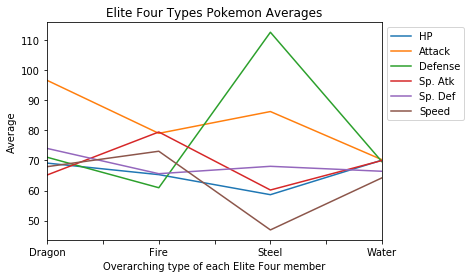

In [0]:
pokemonFour.groupby('Type 1')[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].mean().plot()
plt.ylabel("Average")
plt.xlabel("Overarching type of each Elite Four member")
plt.title('Elite Four Types Pokemon Averages')
plt.legend( bbox_to_anchor = (1,1))

# (2) Create a new variable: *strength*
####  - We see that many Pokemon have the same 'Total' stat, therefore we want to create a *strength* variable to be a more exact judge of a Pokemon's power. 

#### - It is not surprising that the strongest Pokemon are all Legendary and/or Mega Evolved. We removed earlier both types of these special Pokemon for the purposes of our analysis (into the dataset: 'PokemonNormal') because Legendary Pokemon are extremely rare and Mega Evolved Pokemon are not common in Elite Four battles. 


In [0]:
pokemon.sort_values('Total', ascending=False).head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
164,150,MewtwoMega Mewtwo Y,Psychic,None,780,106,150,70,194,120,140,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
422,382,KyogrePrimal Kyogre,Water,None,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
552,493,Arceus,Normal,None,720,120,120,120,120,120,120,4,True
712,646,KyuremWhite Kyurem,Dragon,Ice,700,125,120,90,170,100,95,5,True
711,646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
409,373,SalamenceMega Salamence,Dragon,Flying,700,95,145,130,120,90,120,3,False
413,376,MetagrossMega Metagross,Steel,Psychic,700,80,145,150,105,110,110,3,False


### Calculating *strength*: standardize and sum the baseline statistics

In [0]:
std_stats = pokemon[['#', "Total",	"HP",	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']].drop('Total', axis='columns').set_index('#').apply(lambda x: (x - x.mean()) / x.std())
std_stats['strength'] = std_stats.sum(axis='columns')
std_stats.reset_index(inplace=True)


In [0]:
pokemon = pd.concat([pokemon, std_stats['strength']], axis=1)

### According to the baseline statistics, we see that the Pokemon 'Slaking' is the strongest non-MegaEvolved, non-Legendary Pokemon by far, nearly 2 points higher than the second strongest Pokemon.

In [0]:
pokemon = pokemon.loc[pokemon.Legendary == False]

In [0]:
pokemon.drop_duplicates('#', keep='first', inplace=True)

In [0]:
pokemon.sort_values('strength', ascending=False).head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
313,289,Slaking,Normal,None,670,150,160,100,95,65,100,3,False,8.017787
546,488,Cresselia,Psychic,None,600,120,70,120,75,130,85,4,False,5.919742
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False,5.693104
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,5.681975
165,151,Mew,Psychic,None,600,100,100,100,100,100,100,1,False,5.621572
548,490,Manaphy,Water,None,600,100,100,100,100,100,100,4,False,5.621572
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,5.621572
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,5.617430
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False,5.494952
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False,5.477483


### Type 1 vs. Strength:
- Fighting and Ice type Pokemon have the highest average Strength.
- Flying, Fairy, and Bug type Pokemon have the lowest average Strength.
- Normal Type Pokemon have the greatest range of Strength. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

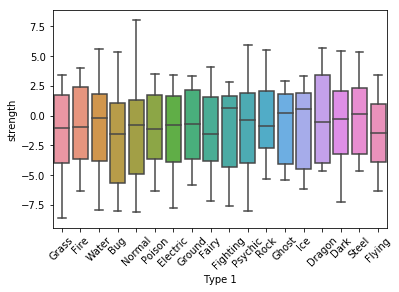

In [0]:
sns.boxplot(x='Type 1', y='strength', data=pokemon)
plt.xticks(rotation=45)

In [0]:
pokemon.shape

(675, 14)

# (3) Get the Kalos Elite Four trainer teams: Malva (4), Siebold (4), Wikstrom (4), Drasna (4), and the final Champion: Diantha. 

In [0]:
# Malva (fire)
malva = pokemon.loc[(pokemon.Name == 'Pyroar')  | (pokemon.Name == 'Torkoal') | (pokemon.Name == 'Chandelure') | (pokemon.Name == 'Talonflame') ]
malva

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
355,324,Torkoal,Fire,None,470,70,85,140,85,70,20,3,False,0.977985
670,609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False,2.675609
731,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False,2.230808
736,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False,2.449236


In [0]:
#Siebold (Water)
siebold = pokemon.loc[ (pokemon['Name'] == "Clawitzer") | (pokemon['Name'] == "Gyarados") | (pokemon['Name'] == "Starmie") | (pokemon['Name'] == "Barbaracle"),]
siebold

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
130,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,1,False,2.780967
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False,3.646351
759,689,Barbaracle,Rock,Water,500,72,105,115,54,86,68,6,False,2.150100
763,693,Clawitzer,Water,None,500,71,73,88,120,89,59,6,False,2.074263


In [0]:
# Wikstrom (steel)
wikstrom = pokemon.loc[(pokemon.Name == 'Klefki')  | (pokemon.Name == 'Probopass') | (pokemon.Name == 'Scizor') | (pokemon.Name == 'AegislashBlade Forme') | (pokemon.Name == 'AegislashShield Forme')]
wikstrom

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
228,212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False,2.072717
528,476,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False,3.079738
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False,2.347023
777,707,Klefki,Steel,Fairy,470,57,80,91,80,87,75,6,False,1.094161


In [0]:
#Drasna (dragon)
drasna = pokemon.loc[ (pokemon['Name'] == "Dragalge") | (pokemon['Name'] == "Druddigon") | (pokemon['Name'] == "Altaria") | (pokemon['Name'] == "Noivern"),]
drasna

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
365,334,Altaria,Dragon,Flying,490,75,70,90,70,105,80,3,False,1.972182
682,621,Druddigon,Dragon,None,485,77,120,90,60,90,48,5,False,1.645228
761,691,Dragalge,Poison,Dragon,494,65,75,90,97,123,44,6,False,1.967745
791,715,Noivern,Flying,Dragon,535,85,70,80,97,80,123,6,False,3.449577


In [0]:
#Diantha (Champion)
diantha = pokemon.loc[ (pokemon['Name'] == "Hawlucha") | (pokemon['Name'] == "Tyrantrum") | (pokemon['Name'] == "Aurorus") | (pokemon['Name'] == "GourgeistAverage Size") | (pokemon['Name'] == "Goodra") | (pokemon['Name'] == "GardevoirMega Gardevoir"),]
diantha

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
767,697,Tyrantrum,Rock,Dragon,521,82,121,119,69,59,71,6,False,2.754374
769,699,Aurorus,Rock,Ice,521,123,77,72,99,92,58,6,False,3.152483
771,701,Hawlucha,Fighting,Flying,500,78,92,75,74,63,118,6,False,2.207096
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,5.681975
784,711,GourgeistAverage Size,Ghost,Grass,494,65,90,122,58,75,84,6,False,1.915841


In [0]:
elitefour = pd.concat([malva, siebold, wikstrom, drasna])
elitefour = elitefour.reset_index(drop=True)
elitefour

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
0,324,Torkoal,Fire,None,470,70,85,140,85,70,20,3,False,0.977985
1,609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False,2.675609
2,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False,2.230808
3,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False,2.449236
4,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,1,False,2.780967
5,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False,3.646351
6,689,Barbaracle,Rock,Water,500,72,105,115,54,86,68,6,False,2.150100
7,693,Clawitzer,Water,None,500,71,73,88,120,89,59,6,False,2.074263
8,212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False,2.072717
9,476,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False,3.079738


In [0]:
elitefour_means = elitefour.iloc[:,4:11].mean()
elitefour_means

Total      504.6875
HP          71.3125
Attack      88.5625
Defense     92.2500
Sp. Atk     89.4375
Sp. Def     88.7500
Speed       74.3750
dtype: float64

### Difference in means between Elite Four and overall pokemon numeric stats. We see that they clearly have higher numeric stats

In [0]:
elitefour_means - pokemon.iloc[:,4:11].mean()

Total      105.886138
HP           8.556402
Attack      17.460741
Defense     23.532275
Sp. Atk     21.857778
Sp. Def     21.919365
Speed       12.559577
dtype: float64

In [0]:
trainer_names = pd.Series(['Malva', 'Malva','Malva','Malva','Siebold','Siebold','Siebold','Siebold','Wikstrom','Wikstrom','Wikstrom','Wikstrom','Drasna','Drasna','Drasna','Drasna'])
elitefour['trainer_names'] = trainer_names
elitefour

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength,trainer_names
0,324,Torkoal,Fire,None,470,70,85,140,85,70,20,3,False,0.977985,Malva
1,609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False,2.675609,Malva
2,663,Talonflame,Fire,Flying,499,78,81,71,74,69,126,6,False,2.230808,Malva
3,668,Pyroar,Fire,Normal,507,86,68,72,109,66,106,6,False,2.449236,Malva
4,121,Starmie,Water,Psychic,520,60,75,85,100,85,115,1,False,2.780967,Siebold
5,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False,3.646351,Siebold
6,689,Barbaracle,Rock,Water,500,72,105,115,54,86,68,6,False,2.150100,Siebold
7,693,Clawitzer,Water,None,500,71,73,88,120,89,59,6,False,2.074263,Siebold
8,212,Scizor,Bug,Steel,500,70,130,100,55,80,65,2,False,2.072717,Wikstrom
9,476,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False,3.079738,Wikstrom


Text(0.5, 1.0, 'Elite Four with Team Averages')

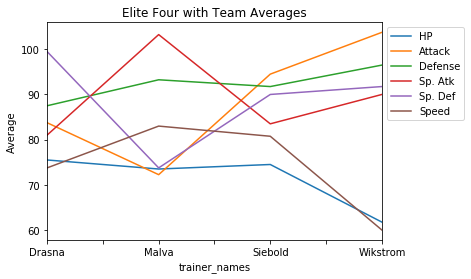

In [0]:
elitefour.groupby(['trainer_names'])[['HP','Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean().plot()
plt.legend( bbox_to_anchor = (1,1))
plt.ylabel('Average')
plt.title('Elite Four with Team Averages')

# (4) Functions to find the best 6-Pokemon team:

  The Elite Four consists of four elite trainers who each specialize in a certain type of Pokémon, as well as a Champion, who commands a diverse team of powerful Pokémon. When challenging the Elite Four, we must battle each Elite Four trainer sequentially, before finally battling the Champion, and once we begin battling the Elite Four, we are unable to substitute any Pokémon on our team. For this reason, our team of six Pokémon must contain diverse types, so that we will always have at least one Pokémon that will be strong against any Pokémon the Elite Four sends out.

  In selecting the best six Pokémon, we first find the four best Pokémon that counter the type specialization of each Elite Four trainer. For example, if one trainer specializes in fire, then we find which types are super effective against fire, and then we find the strongest Pokémon amongst these types that has the highest strength. Then we find the strongest two Pokémon that counters the Champion’s Pokémon. For each Pokémon the Champion has, we find what type counters that Pokémon, and find which Pokémon contain the highest strength within each type. We end up with a DataFrame containing all the top counters to the Champion’s Pokémon, and within this DataFrame, we select the Top 2 Pokémon with diverse types to round out our team of six. 


In [0]:
def counters(pokemonname):
  #Get pokemon type
  pokemontype1 = pokemon.loc[(pokemon['Name'] == pokemonname), ['Type 1']]
  pokemontype1 = str.lower(pokemontype1['Type 1'].values[0])
  pokemontype2 = pokemon.loc[(pokemon['Name'] == pokemonname), ['Type 2']]
  pokemontype2 = str.lower(pokemontype2['Type 2'].values[0])
  
  #Get strongest type counters for pokemon
  twotype = types.loc[(types['defense-type1'] == pokemontype1) & (types['defense-type2'] == pokemontype2), 'normal':]
  maxweakness = twotype.max(axis = 1)
  typecounters = twotype[twotype >= maxweakness.values[0]].dropna(axis = 1, how = 'all')
 
  #Get Top 3 pokemon for all type counters
  counter = pd.DataFrame([])
  for c in typecounters.columns:
     counter = counter.append(pokemon[(pokemon['Type 1'] == c.capitalize()) | (pokemon['Type 2'] == c.capitalize())].sort_values(['strength'], ascending = False).head(3))
  return(counter)

In [0]:
def typecounter(type):
  typeweakness = types.loc[(types['defense-type1'] == type) & (types['defense-type2'] == 'none'), 'normal':]
  supereffective = typeweakness[typeweakness >= 2].dropna(axis = 1, how = 'all')
  
  #Get top pokemon for type
  counter = pd.DataFrame([])
  for c in supereffective.columns:
     counter = counter.append(pokemon[(pokemon['Type 1'] == c.capitalize()) | (pokemon['Type 2'] == c.capitalize())].sort_values(['strength'], ascending = False).head(3))
  return(counter.head(1))


In [0]:
championcounter = pd.DataFrame([])
championcounter = championcounter.append(counters("Tyrantrum")).append(counters("Aurorus")).append(counters("Hawlucha")).append(counters("Goodra")).append(counters("GourgeistAverage Size"))

In [0]:
champtop10 = championcounter.sort_values('strength', ascending = False).head(10)
champtop10

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
546,488,Cresselia,Psychic,None,600,120,70,120,75,130,85,4,False,5.919742
715,648,MeloettaAria Forme,Normal,Psychic,600,100,77,77,128,128,90,5,False,5.693104
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,5.681975
776,706,Goodra,Dragon,None,600,90,100,70,110,150,80,6,False,5.681975
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False,5.621572
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,5.617430
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,5.617430
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,5.617430
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False,5.494952
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False,5.477483


In [0]:
champtop1 = championcounter.sort_values('strength', ascending = False).head(1)
champtop1

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
546,488,Cresselia,Psychic,None,600,120,70,120,75,130,85,4,False,5.919742


### First, we choose Cresselia to counter the Champion, which is the strongest Pokemon that is spit out from our function. However we notice that the next strongest Pokemon, MeloettaAria Forme, has the same Psychic Type as Cresselia. To diversify our 6-member Pokemon team, we will choose the Pokemon with the most frequently occurring duplicate Pokemon. The reason there are duplicate Pokemon among the champion top ten counters is because there were 3 counter Pokemon appended for each Pokemon in the Champion's team. By choosing the Pokemon that is most frequently occurring, we are taking advantage of how certain Pokemons are highly effective against more than one of the Champion's team members.

In [0]:
champtop10.groupby(champtop10.columns.tolist(),as_index=False).size().sort_values(ascending = False)

#    Name                Type 1   Type 2   Total  HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  strength
445  Garchomp            Dragon   Ground   600    108  130     95       80       85       102    4           False      5.617430    3
706  Goodra              Dragon   None     600    90   100     70       110      150      80     6           False      5.681975    2
648  MeloettaAria Forme  Normal   Psychic  600    100  77      77       128      128      90     5           False      5.693104    1
635  Hydreigon           Dark     Dragon   600    92   105     90       125      90       98     5           False      5.477483    1
488  Cresselia           Psychic  None     600    120  70      120      75       130      85     4           False      5.919742    1
251  Celebi              Psychic  Grass    600    100  100     100      100      100      100    2           False      5.621572    1
248  Tyranitar           Rock     Dark     600    100  134     110 

In [0]:
champhighfreq = championcounter.sort_values('strength', ascending = False).iloc[6,]
champhighfreq

#                  445
Name          Garchomp
Type 1          Dragon
Type 2          Ground
Total              600
HP                 108
Attack             130
Defense             95
Sp. Atk             80
Sp. Def             85
Speed              102
Generation           4
Legendary        False
strength       5.61743
Name: 493, dtype: object

### From here, we choose Garchomp to take the last open position in our 6-member team, because it not only is a different type (Dragon and Ground) from Cresselia (Psychic), but it also appears multiple times as an effective counter for the champion's team and remains high in strength. Thereby our decision to select Garchomp both diversifies the types we have, and chooses the most Pokemon that is highly effective against more than one of the Champion's team members.

In [0]:
#Best six pokemon to challenge the elite four 
bestsix = pd.DataFrame([])
bestsix.append(typecounter('fire')).append(typecounter('water')).append(typecounter('steel')).append(typecounter('dragon')).append(champtop1).append(champhighfreq)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,strength
548,490,Manaphy,Water,None,600,100,100,100,100,100,100,4,False,5.621572
517,466,Electivire,Electric,None,540,75,123,67,95,85,95,4,False,3.429017
64,59,Arcanine,Fire,None,555,90,110,80,100,80,95,1,False,4.005947
142,131,Lapras,Water,Ice,535,130,85,80,85,95,60,1,False,3.678424
546,488,Cresselia,Psychic,None,600,120,70,120,75,130,85,4,False,5.919742
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False,5.617430
